In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#IMPORTING DATA ON LOANS 
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


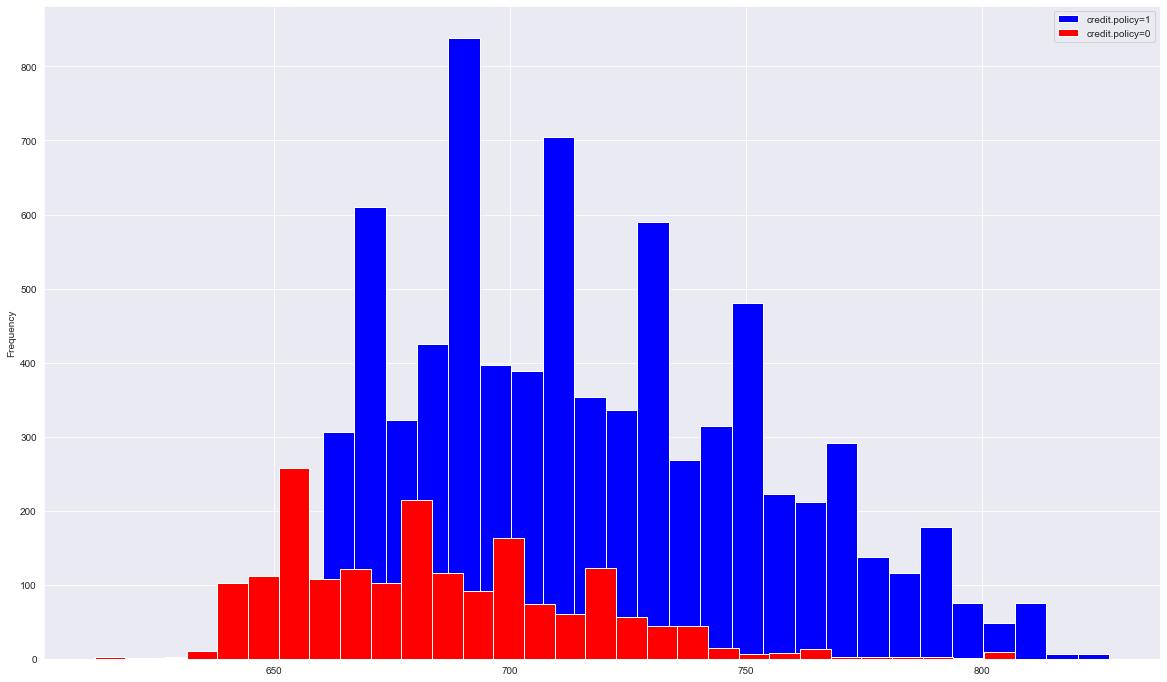

In [4]:
# Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(20,12))
yo=loans[loans['credit.policy']==1]['fico']
yo.plot.hist(bins=30,color='blue',label='credit.policy=1')
yor=loans[loans['credit.policy']==0]['fico']
yor.plot.hist(bins=30,color='red',label='credit.policy=0')
plt.legend()

In [ ]:
#Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid

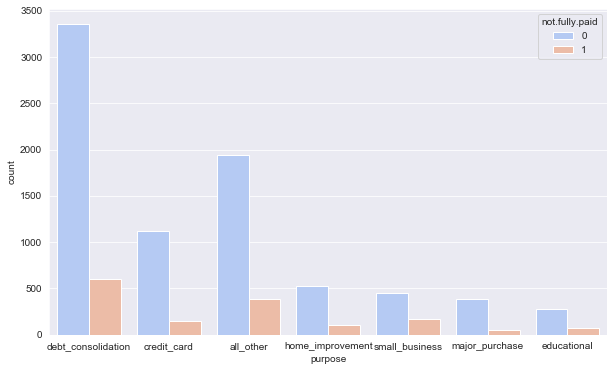

In [25]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x=loans['purpose'],data=loans,palette='coolwarm',hue='not.fully.paid')

In [ ]:
#Analysing the trend between FICO score and interest rate.

<Figure size 792x504 with 0 Axes>

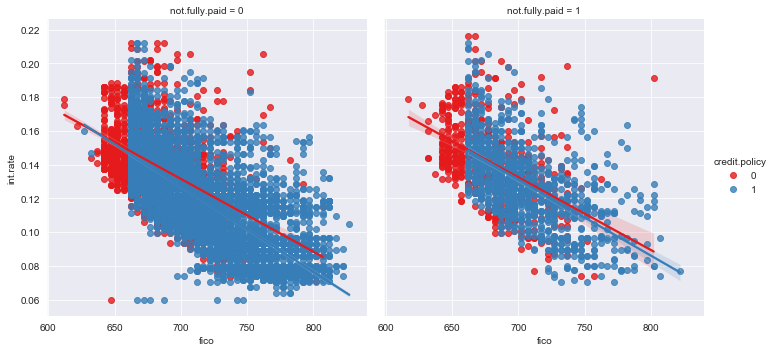

In [6]:
fig=plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',data=loans,palette='Set1')

In [ ]:
#Converting categorical features to numerical values

In [8]:
d=pd.get_dummies(data=loans,columns=['purpose'],drop_first=True)

In [ ]:
#Making a new dataframe with added features

In [9]:
final_data=pd.DataFrame(d,columns=d.columns)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [ ]:
#Decision tree model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=final_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']]
y=final_data.iloc[:,12]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
predictions=dtree.predict(X_test)
actual_values=y_test.values

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2388
           1       0.23      0.21      0.22       486

    accuracy                           0.75      2874
   macro avg       0.54      0.53      0.53      2874
weighted avg       0.74      0.75      0.74      2874



In [17]:
print(confusion_matrix(y_test,predictions))

[[2038  382]
 [ 350  104]]


In [ ]:
#Random Forest Classification model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
predictions=rfc.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2420
           1       0.48      0.02      0.04       454

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.84      0.78      2874



In [24]:
print(confusion_matrix(y_test,predictions))

[[2409   11]
 [ 444   10]]


In [26]:
# RANDOM FOREST PERFORMS BETTER THAN DECISION TREE